In [70]:
%run import_getters.ipynb    
%run import_plots.ipynb
%run import_dbase.ipynb


In [71]:
def timeQuery (dataBase, run, startTime, endTime):
    ''' NAME
        timeQuery 

    FILE
        import_getters.ipynb

    DESCRIPTION

        This function establishes a MySQL connection between the python notebook and the server to fetch data
        for a specified time frame.  The function creates and outputs 5 dataframes out of the raw data fetched.
        - Log 
        - PLC
        - FlowIn
        - FlowOut
        - Voltage

        If the connection to the MySQL database cannot be established it throws an exception.     

    INPUT
        dataBase:  string name of database
        run:       string name of run 
        startTime: time in string format (YYYY-MM-DD 00:00:00.000000)
        endTime:   time in string format (YYYY-MM-DD 00:00:00.000000)

    RETURN
        5 panda dataframes 

    EXAMPLE
    
        dataBase  = 'rct007'
        run       = '004'
        startTime = '2016-06-28 00:46:39.381692'
        endTime   = '2016-06-28 01:16:41.334500'
        
        [plcDf, logDf, flowInDf, flowOutDf, voltageDf] = timeQuery(dataBase, run, startTime, endTime)'''
    
    # Establish a MySQL connection with the server, throw an exeption if the connection cannot be established. 
    
    try:
        cursor = connectDbase(dataBase)
    except:
        sys.exit('Connection to MySQL database cannot be established')
    
    # Define table names for query
    tbName0 = run + '_plcdata'
    tbName1 = run+ '_logdata'
    tbName2 = run + '_flowindata'
    tbName3 = run + '_flowoutdata'
    tbName4 = run + '_voltagedata'

    # Fetch data from server
    plc     = readDateTable(cursor, tbName0, startTime, endTime)
    log     = readDateTable(cursor,tbName1, startTime, endTime)
    flowIn  = readDateTable(cursor,tbName2, startTime, endTime)
    flowOut = readDateTable(cursor,tbName3, startTime, endTime)
#    voltage = readDateTable(cursor,tbName4, startTime, endTime)
    
    # Create dataFrame from queries
    plcDf     = pd.DataFrame(plc)
    logDf     = pd.DataFrame(log)
    flowInDf  = pd.DataFrame(flowIn)
    flowOutDf = pd.DataFrame(flowOut)
#    voltageDf = pd.DataFrame(voltage)

    return plcDf,logDf,flowInDf,flowOutDf

In [113]:
end = datetime.datetime.utcnow()
start = end - datetime.timedelta(hours=12)
end = str(pd.to_datetime(end))
start = str(pd.to_datetime(start))

In [110]:
A = timeQuery('rct007', '004', start, end)

In [111]:
v = A[0]

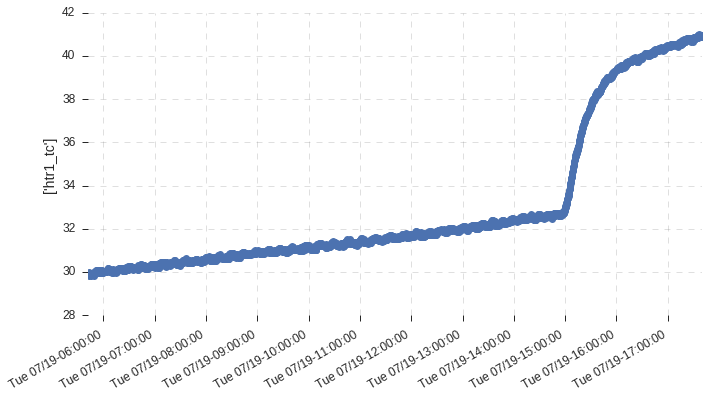

In [112]:
iSlidePlot(v)

In [25]:
A = timeQuery('rct007', '004', '2016-07-12 22:03:00', '2016-07-12 22:04:00')

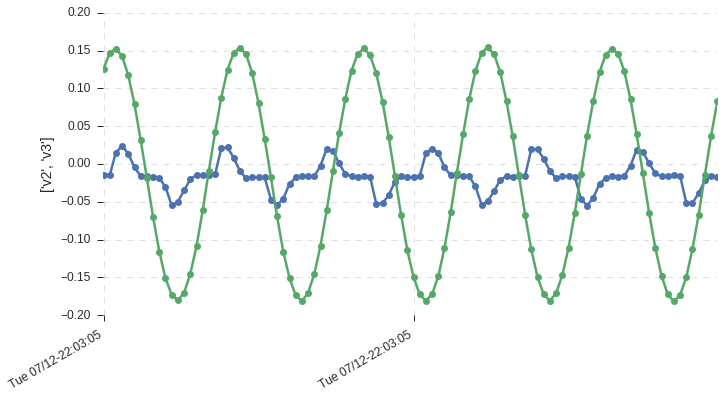

In [26]:
v = A[4]
iSlidePlot(v)

NameError: name 'parseLog' is not defined